# Biodiversity in US National Parks

## Coder Girl 2021 Data Science Final Project

### Chrissy Bellizzi and Jenny Arbuszewski

# Executive Summary

## Importing necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#defining a function to read our csv files and create dataframes
def read_csv(file, data_type = None):
    df_name = pd.read_csv(file, dtype = data_type)
    return df_name

species_df = read_csv('species.csv', str)
species_df.head()

#This is honestly faster to NOT use a function.

,Species ID,Park Name,Category,Order,Family,Scientific Name,Common Names,Record Status,Occurrence,Nativeness,Abundance,Seasonality,Conservation Status,Unnamed: 13
0,ACAD-1000,Acadia National Park,Mammal,Artiodactyla,Cervidae,Alces alces,Moose,Approved,Present,Native,Rare,Resident,NaN,NaN
1,ACAD-1001,Acadia National Park,Mammal,Artiodactyla,Cervidae,Odocoileus virginianus,"Northern White-Tailed Deer, Virginia Deer, Whi...",Approved,Present,Native,Abundant,NaN,NaN,NaN
2,ACAD-1002,Acadia National Park,Mammal,Carnivora,Canidae,Canis latrans,"Coyote, Eastern Coyote",Approved,Present,Not Native,Common,NaN,Species of Concern,NaN
3,ACAD-1003,Acadia National Park,Mammal,Carnivora,Canidae,Canis lupus,"Eastern Timber Wolf, Gray Wolf, Timber Wolf",Approved,Not Confirmed,Native,NaN,NaN,Endangered,NaN
4,ACAD-1004,Acadia National Park,Mammal,Carnivora,Canidae,Vulpes vulpes,"Black Fox, Cross Fox, Eastern Red Fox, Fox, Re...",Approved,Present,Unknown,Common,Breeder,NaN,NaN


In [3]:
parks_df = read_csv('parks.csv')
parks_df.head()

,Park Code,Park Name,State,Acres,Latitude,Longitude
0,ACAD,Acadia National Park,ME,47390,44.35,-68.21
1,ARCH,Arches National Park,UT,76519,38.68,-109.57
2,BADL,Badlands National Park,SD,242756,43.75,-102.50
3,BIBE,Big Bend National Park,TX,801163,29.25,-103.25
4,BISC,Biscayne National Park,FL,172924,25.65,-80.08


# Preprocessing

## Renaming Columns to eliminate spaces

In [4]:
species_df.rename(columns = {'Species ID':'Species_ID'}, inplace = True)

species_df.rename(columns = {'Park Name':'Park_name'}, inplace = True)

species_df.rename(columns = {'Scientific Name':'Scientific_name'}, inplace = True)

species_df.rename(columns = {'Common Names':'Common_name'}, inplace = True)

species_df.rename(columns = {'Record Status':'Record_status'}, inplace = True)

species_df.rename(columns = {'Conservation Status':'Conservation_status'}, inplace = True)
species_df

,Species_ID,Park_name,Category,Order,Family,Scientific_name,Common_name,Record_status,Occurrence,Nativeness,Abundance,Seasonality,Conservation_status,Unnamed: 13
0,ACAD-1000,Acadia National Park,Mammal,Artiodactyla,Cervidae,Alces alces,Moose,Approved,Present,Native,Rare,Resident,NaN,NaN
1,ACAD-1001,Acadia National Park,Mammal,Artiodactyla,Cervidae,Odocoileus virginianus,"Northern White-Tailed Deer, Virginia Deer, Whi...",Approved,Present,Native,Abundant,NaN,NaN,NaN
2,ACAD-1002,Acadia National Park,Mammal,Carnivora,Canidae,Canis latrans,"Coyote, Eastern Coyote",Approved,Present,Not Native,Common,NaN,Species of Concern,NaN
3,ACAD-1003,Acadia National Park,Mammal,Carnivora,Canidae,Canis lupus,"Eastern Timber Wolf, Gray Wolf, Timber Wolf",Approved,Not Confirmed,Native,NaN,NaN,Endangered,NaN
4,ACAD-1004,Acadia National Park,Mammal,Carnivora,Canidae,Vulpes vulpes,"Black Fox, Cross Fox, Eastern Red Fox, Fox, Re...",Approved,Present,Unknown,Common,Breeder,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119243,ZION-2791,Zion National Park,Vascular Plant,Solanales,Solanaceae,Solanum triflorum,Cut-Leaf Nightshade,Approved,Present,Native,Uncommon,NaN,NaN,NaN
119244,ZION-2792,Zion National Park,Vascular Plant,Vitales,Vitaceae,Vitis arizonica,Canyon Grape,Approved,Present,Native,Uncommon,NaN,NaN,NaN
119245,ZION-2793,Zion National Park,Vascular Plant,Vitales,Vitaceae,Vitis vinifera,Wine Grape,Approved,Present,Not Native,Uncommon,NaN,NaN,NaN
119246,ZION-2794,Zion National Park,Vascular Plant,Zygophyllales,Zygophyllaceae,Larrea tridentata,Creosote Bush,Approved,Present,Native,Rare,NaN,NaN,NaN


In [5]:
#removing spaces for park code and park name

parks_df.rename(columns = {'Park Code':'Park_code'}, inplace = True)

parks_df.rename(columns = {'Park Name':'Park_name'}, inplace = True)

parks_df.head()

,Park_code,Park_name,State,Acres,Latitude,Longitude
0,ACAD,Acadia National Park,ME,47390,44.35,-68.21
1,ARCH,Arches National Park,UT,76519,38.68,-109.57
2,BADL,Badlands National Park,SD,242756,43.75,-102.50
3,BIBE,Big Bend National Park,TX,801163,29.25,-103.25
4,BISC,Biscayne National Park,FL,172924,25.65,-80.08


## Removing Empty column

In [6]:
species_df.head()
#Note: not sure why there is a 14th data column showing-there are only 13 columns of data-this is confirmed
#in the documentation for the dataset. Will come back and drop that.

,Species_ID,Park_name,Category,Order,Family,Scientific_name,Common_name,Record_status,Occurrence,Nativeness,Abundance,Seasonality,Conservation_status,Unnamed: 13
0,ACAD-1000,Acadia National Park,Mammal,Artiodactyla,Cervidae,Alces alces,Moose,Approved,Present,Native,Rare,Resident,NaN,NaN
1,ACAD-1001,Acadia National Park,Mammal,Artiodactyla,Cervidae,Odocoileus virginianus,"Northern White-Tailed Deer, Virginia Deer, Whi...",Approved,Present,Native,Abundant,NaN,NaN,NaN
2,ACAD-1002,Acadia National Park,Mammal,Carnivora,Canidae,Canis latrans,"Coyote, Eastern Coyote",Approved,Present,Not Native,Common,NaN,Species of Concern,NaN
3,ACAD-1003,Acadia National Park,Mammal,Carnivora,Canidae,Canis lupus,"Eastern Timber Wolf, Gray Wolf, Timber Wolf",Approved,Not Confirmed,Native,NaN,NaN,Endangered,NaN
4,ACAD-1004,Acadia National Park,Mammal,Carnivora,Canidae,Vulpes vulpes,"Black Fox, Cross Fox, Eastern Red Fox, Fox, Re...",Approved,Present,Unknown,Common,Breeder,NaN,NaN


In [7]:
#drop that extra column in species_df
species_df = species_df.iloc[: , :-1]
species_df

,Species_ID,Park_name,Category,Order,Family,Scientific_name,Common_name,Record_status,Occurrence,Nativeness,Abundance,Seasonality,Conservation_status
0,ACAD-1000,Acadia National Park,Mammal,Artiodactyla,Cervidae,Alces alces,Moose,Approved,Present,Native,Rare,Resident,NaN
1,ACAD-1001,Acadia National Park,Mammal,Artiodactyla,Cervidae,Odocoileus virginianus,"Northern White-Tailed Deer, Virginia Deer, Whi...",Approved,Present,Native,Abundant,NaN,NaN
2,ACAD-1002,Acadia National Park,Mammal,Carnivora,Canidae,Canis latrans,"Coyote, Eastern Coyote",Approved,Present,Not Native,Common,NaN,Species of Concern
3,ACAD-1003,Acadia National Park,Mammal,Carnivora,Canidae,Canis lupus,"Eastern Timber Wolf, Gray Wolf, Timber Wolf",Approved,Not Confirmed,Native,NaN,NaN,Endangered
4,ACAD-1004,Acadia National Park,Mammal,Carnivora,Canidae,Vulpes vulpes,"Black Fox, Cross Fox, Eastern Red Fox, Fox, Re...",Approved,Present,Unknown,Common,Breeder,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
119243,ZION-2791,Zion National Park,Vascular Plant,Solanales,Solanaceae,Solanum triflorum,Cut-Leaf Nightshade,Approved,Present,Native,Uncommon,NaN,NaN
119244,ZION-2792,Zion National Park,Vascular Plant,Vitales,Vitaceae,Vitis arizonica,Canyon Grape,Approved,Present,Native,Uncommon,NaN,NaN
119245,ZION-2793,Zion National Park,Vascular Plant,Vitales,Vitaceae,Vitis vinifera,Wine Grape,Approved,Present,Not Native,Uncommon,NaN,NaN
119246,ZION-2794,Zion National Park,Vascular Plant,Zygophyllales,Zygophyllaceae,Larrea tridentata,Creosote Bush,Approved,Present,Native,Rare,NaN,NaN


### Dropping the species_id column

This column is somewhat redundant. We can essentially get the same information by combining the park name and scientific name so it will be removed from our primary dataframe.

In [8]:
species_df= species_df.drop(['Species_ID'], axis=1)

### Creating a new column for Plant/Animal Boolean

We wanted a simple way to filter by whether or not the organism in question was a plant or an animal. We recognize that fungi do not belong to either designation but for simplicity and ease of calculations, here we include all fungi in the plant category

In [9]:
plant_animal_boolean_list = []
for entry in species_df['Category']:
    if entry == 'Vascular Plant' or  entry =='Fungi' or entry =='Nonvascular Plant' or entry =='Algae':
        plant_animal_boolean = 0
        plant_animal_boolean_list.append(plant_animal_boolean)
    else:
        plant_animal_boolean = 1
        plant_animal_boolean_list.append(plant_animal_boolean)

species_df['plant_animal_boolean'] = plant_animal_boolean_list

species_df.head()

,Park_name,Category,Order,Family,Scientific_name,Common_name,Record_status,Occurrence,Nativeness,Abundance,Seasonality,Conservation_status,plant_animal_boolean
0,Acadia National Park,Mammal,Artiodactyla,Cervidae,Alces alces,Moose,Approved,Present,Native,Rare,Resident,NaN,1
1,Acadia National Park,Mammal,Artiodactyla,Cervidae,Odocoileus virginianus,"Northern White-Tailed Deer, Virginia Deer, Whi...",Approved,Present,Native,Abundant,NaN,NaN,1
2,Acadia National Park,Mammal,Carnivora,Canidae,Canis latrans,"Coyote, Eastern Coyote",Approved,Present,Not Native,Common,NaN,Species of Concern,1
3,Acadia National Park,Mammal,Carnivora,Canidae,Canis lupus,"Eastern Timber Wolf, Gray Wolf, Timber Wolf",Approved,Not Confirmed,Native,NaN,NaN,Endangered,1
4,Acadia National Park,Mammal,Carnivora,Canidae,Vulpes vulpes,"Black Fox, Cross Fox, Eastern Red Fox, Fox, Re...",Approved,Present,Unknown,Common,Breeder,NaN,1


### Looking at the values and number of unique entries for most categories

In [10]:
def unique(dataframe, column):
    print('The unique categories and number of values for ' + column + ' are: ')
    print(dataframe[str(column)].unique())
    print(dataframe[str(column)].nunique())

unique(species_df, 'Category')

The unique categories and number of values for Category are: 
['Mammal' 'Bird' 'Reptile' 'Amphibian' 'Fish' 'Vascular Plant'
 'Spider/Scorpion' 'Insect' 'Invertebrate' 'Fungi' 'Nonvascular Plant'
 'Crab/Lobster/Shrimp' 'Slug/Snail' 'Algae']
14


In [11]:
unique(species_df, 'Park_name')

The unique categories and number of values for Park_name are: 
['Acadia National Park' 'Arches National Park' 'Badlands National Park'
 'Big Bend National Park' 'Biscayne National Park'
 'Black Canyon of the Gunnison National Park' 'Bryce Canyon National Park'
 'Canyonlands National Park' 'Capitol Reef National Park'
 'Carlsbad Caverns National Park' 'Channel Islands National Park'
 'Congaree National Park' 'Crater Lake National Park'
 'Cuyahoga Valley National Park' 'Denali National Park and Preserve'
 'Death Valley National Park' 'Dry Tortugas National Park'
 'Everglades National Park'
 'Gates Of The Arctic National Park and Preserve' 'Glacier National Park'
 'Glacier Bay National Park and Preserve' 'Great Basin National Park'
 'Grand Canyon National Park'
 'Great Sand Dunes National Park and Preserve'
 'Great Smoky Mountains National Park' 'Grand Teton National Park'
 'Guadalupe Mountains National Park' 'Haleakala National Park'
 'Hawaii Volcanoes National Park' 'Hot Springs Nationa

In [12]:
unique(species_df, 'Order')

The unique categories and number of values for Order are: 
['Artiodactyla' 'Carnivora' 'Chiroptera' 'Lagomorpha' 'Rodentia'
 'Soricomorpha' 'Accipitriformes' 'Anseriformes' 'Apodiformes'
 'Caprimulgiformes' 'Charadriiformes' 'Columbiformes' 'Coraciiformes'
 'Cuculiformes' 'Falconiformes' 'Galliformes' 'Gaviiformes' 'Gruiformes'
 'Passeriformes' 'Pelecaniformes' 'Piciformes' 'Podicipediformes'
 'Procellariiformes' 'Strigiformes' 'Suliformes' 'Squamata' 'Testudines'
 'Anura' 'Caudata' 'Anguilliformes' 'Atheriniformes' 'Clupeiformes'
 'Cypriniformes' 'Cyprinodontiformes' 'Esociformes' 'Gadiformes'
 'Gasterosteiformes' 'Osmeriformes' 'Perciformes' 'Pleuronectiformes'
 'Salmoniformes' 'Siluriformes' nan 'Acorales' 'Alismatales' 'Apiales'
 'Aquifoliales' 'Asparagales' 'Asterales' 'Boraginales' 'Brassicales'
 'Caryophyllales' 'Celastrales' 'Ceratophyllales' 'Commelinales'
 'Cornales' 'Cucurbitales' 'Dipsacales' 'Equisetales' 'Ericales' 'Fabales'
 'Fagales' 'Gentianales' 'Geraniales' 'Isoetale

In [13]:
unique(species_df, 'Family')

The unique categories and number of values for Family are: 
['Cervidae' 'Canidae' 'Felidae' ... 'Pseudeurotiaceae'
 'Cunninghamellaceae' 'Saccharomycetaceae']
2332


In [14]:
unique(species_df, 'Scientific_name')

The unique categories and number of values for Scientific_name are: 
['Alces alces' 'Odocoileus virginianus' 'Canis latrans' ...
 'Selaginella utahensis' 'Calystegia longipes'
 'Physalis hederifolia var. palmeri']
46022


In [15]:
unique(species_df, 'Category')

The unique categories and number of values for Category are: 
['Mammal' 'Bird' 'Reptile' 'Amphibian' 'Fish' 'Vascular Plant'
 'Spider/Scorpion' 'Insect' 'Invertebrate' 'Fungi' 'Nonvascular Plant'
 'Crab/Lobster/Shrimp' 'Slug/Snail' 'Algae']
14


In [16]:
unique_states = parks_df['State'].unique()
print(unique_states)

num_unique_states = parks_df['State'].nunique()
print(num_unique_states)

['ME' 'UT' 'SD' 'TX' 'FL' 'CO' 'NM' 'CA' 'SC' 'OR' 'OH' 'AK' 'CA, NV' 'MT'
 'NV' 'AZ' 'TN, NC' 'WY' 'HI' 'AR' 'MI' 'KY' 'WA' 'VA' 'ND' 'MN'
 'WY, MT, ID']
27


### Considering basic information about size of parks

In [17]:
parks_df['Acres'].describe()

count    5.600000e+01
mean     9.279291e+05
std      1.709258e+06
min      5.550000e+03
25%      6.901050e+04
50%      2.387645e+05
75%      8.173602e+05
max      8.323148e+06
Name: Acres, dtype: float64

## First Pass -- missing data, data types, etc

### Seasonality

In [18]:
#what are the possible labels for the "Seasonality" column?
species_df["Seasonality"].value_counts()

Breeder                                 12214
Resident                                 3215
Migratory                                2825
Vagrant                                  1660
Breeder, Winter                            64
Rare                                       35
Summer                                     26
Migratory, Winter                          24
Winter                                     20
Breeder, Resident                          20
Breeder, Migratory                         13
Resident, Winter                            9
Uncommon                                    5
Migratory, Vagrant                          4
Common                                      4
Migratory, Summer                           3
Breeder, Resident, Summer                   3
Unknown                                     3
Summer, Vagrant                             3
Breeder, Summer                             2
Resident, Summer                            2
Breeder, Resident, Migratory, Summ

In [19]:
#need to retain Seasonality NaNs or we lose the Plants

new_seasons = []

for index, row in species_df.iterrows():
    if row['plant_animal_boolean'] == 1:
        if row['Seasonality'] == '' or row['Seasonality'] == 'NaN' or pd.isna(row['Seasonality']):
            new_seasons.append('Not_known')
        else:
            new_seasons.append(row['Seasonality'])
    else:
        new_seasons.append('Plant')
        
species_df['Seasonality'] = new_seasons

species_df

,Park_name,Category,Order,Family,Scientific_name,Common_name,Record_status,Occurrence,Nativeness,Abundance,Seasonality,Conservation_status,plant_animal_boolean
0,Acadia National Park,Mammal,Artiodactyla,Cervidae,Alces alces,Moose,Approved,Present,Native,Rare,Resident,NaN,1
1,Acadia National Park,Mammal,Artiodactyla,Cervidae,Odocoileus virginianus,"Northern White-Tailed Deer, Virginia Deer, Whi...",Approved,Present,Native,Abundant,Not_known,NaN,1
2,Acadia National Park,Mammal,Carnivora,Canidae,Canis latrans,"Coyote, Eastern Coyote",Approved,Present,Not Native,Common,Not_known,Species of Concern,1
3,Acadia National Park,Mammal,Carnivora,Canidae,Canis lupus,"Eastern Timber Wolf, Gray Wolf, Timber Wolf",Approved,Not Confirmed,Native,NaN,Not_known,Endangered,1
4,Acadia National Park,Mammal,Carnivora,Canidae,Vulpes vulpes,"Black Fox, Cross Fox, Eastern Red Fox, Fox, Re...",Approved,Present,Unknown,Common,Breeder,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
119243,Zion National Park,Vascular Plant,Solanales,Solanaceae,Solanum triflorum,Cut-Leaf Nightshade,Approved,Present,Native,Uncommon,Plant,NaN,0
119244,Zion National Park,Vascular Plant,Vitales,Vitaceae,Vitis arizonica,Canyon Grape,Approved,Present,Native,Uncommon,Plant,NaN,0
119245,Zion National Park,Vascular Plant,Vitales,Vitaceae,Vitis vinifera,Wine Grape,Approved,Present,Not Native,Uncommon,Plant,NaN,0
119246,Zion National Park,Vascular Plant,Zygophyllales,Zygophyllaceae,Larrea tridentata,Creosote Bush,Approved,Present,Native,Rare,Plant,NaN,0


In [20]:
#20 labels in "Seasonality"; several have only a few entries - outliers may skew data
#good amount of null values as well
#let's focus on four main "Seasonality" labels
#and Plants!

species_df = species_df[species_df['Seasonality'].isin(["Breeder", "Resident", "Vagrant", "Migratory", "Plant"])]
species_df

,Park_name,Category,Order,Family,Scientific_name,Common_name,Record_status,Occurrence,Nativeness,Abundance,Seasonality,Conservation_status,plant_animal_boolean
0,Acadia National Park,Mammal,Artiodactyla,Cervidae,Alces alces,Moose,Approved,Present,Native,Rare,Resident,NaN,1
4,Acadia National Park,Mammal,Carnivora,Canidae,Vulpes vulpes,"Black Fox, Cross Fox, Eastern Red Fox, Fox, Re...",Approved,Present,Unknown,Common,Breeder,NaN,1
6,Acadia National Park,Mammal,Carnivora,Felidae,Lynx rufus,"Bay Lynx, Bobcat, Red Lynx, Wild Cat",Approved,Not Present (Historical Report),Not Native,NaN,Vagrant,NaN,1
8,Acadia National Park,Mammal,Carnivora,Mustelidae,Lutra canadensis,"Otter, River Otter",Approved,Present,Native,Common,Breeder,NaN,1
22,Acadia National Park,Mammal,Chiroptera,Vespertilionidae,Lasiurus borealis,"Eastern Red Bat, New York Bat, Northern Red Ba...",Approved,Present,Native,Occasional,Migratory,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
119243,Zion National Park,Vascular Plant,Solanales,Solanaceae,Solanum triflorum,Cut-Leaf Nightshade,Approved,Present,Native,Uncommon,Plant,NaN,0
119244,Zion National Park,Vascular Plant,Vitales,Vitaceae,Vitis arizonica,Canyon Grape,Approved,Present,Native,Uncommon,Plant,NaN,0
119245,Zion National Park,Vascular Plant,Vitales,Vitaceae,Vitis vinifera,Wine Grape,Approved,Present,Not Native,Uncommon,Plant,NaN,0
119246,Zion National Park,Vascular Plant,Zygophyllales,Zygophyllaceae,Larrea tridentata,Creosote Bush,Approved,Present,Native,Rare,Plant,NaN,0


### Abundance

In [21]:
#what are the possible labels for the "Abundance" column?
species_df["Abundance"].value_counts()

Unknown       23185
Uncommon      18383
Common        12611
Rare          10334
Occasional     3036
Abundant       2304
Native           27
Not Native        9
Name: Abundance, dtype: int64

In [22]:
#Remove Native and Not Native as those are clearly typos. Replace with 'Entry_error'

species_df.loc[(species_df.Abundance == 'Native'),'Abundance']='Entry_error'     
species_df.loc[(species_df.Abundance == 'Not Native'),'Abundance']='Entry_error'
species_df['Abundance'].value_counts()

/Applications/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


Unknown        23185
Uncommon       18383
Common         12611
Rare           10334
Occasional      3036
Abundant        2304
Entry_error       36
Name: Abundance, dtype: int64

### Handling NaNs

In [23]:
species_df.isnull().sum()

Park_name                   0
Category                    0
Order                     920
Family                    901
Scientific_name             0
Common_name                 0
Record_status               0
Occurrence              11271
Nativeness              13863
Abundance               26703
Seasonality                 0
Conservation_status     93099
plant_animal_boolean        0
dtype: int64

In [24]:
species_df.loc[(species_df.Conservation_status.isnull()),'Conservation_status']='None_given'
species_df.head()

,Park_name,Category,Order,Family,Scientific_name,Common_name,Record_status,Occurrence,Nativeness,Abundance,Seasonality,Conservation_status,plant_animal_boolean
0,Acadia National Park,Mammal,Artiodactyla,Cervidae,Alces alces,Moose,Approved,Present,Native,Rare,Resident,None_given,1
4,Acadia National Park,Mammal,Carnivora,Canidae,Vulpes vulpes,"Black Fox, Cross Fox, Eastern Red Fox, Fox, Re...",Approved,Present,Unknown,Common,Breeder,None_given,1
6,Acadia National Park,Mammal,Carnivora,Felidae,Lynx rufus,"Bay Lynx, Bobcat, Red Lynx, Wild Cat",Approved,Not Present (Historical Report),Not Native,NaN,Vagrant,None_given,1
8,Acadia National Park,Mammal,Carnivora,Mustelidae,Lutra canadensis,"Otter, River Otter",Approved,Present,Native,Common,Breeder,None_given,1
22,Acadia National Park,Mammal,Chiroptera,Vespertilionidae,Lasiurus borealis,"Eastern Red Bat, New York Bat, Northern Red Ba...",Approved,Present,Native,Occasional,Migratory,None_given,1


In [26]:
species_df.dropna(subset = ["Abundance"], inplace=True)
species_df

<ipython-input-26-304e2047fd7f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  species_df.dropna(subset = ["Abundance"], inplace=True)


,Park_name,Category,Order,Family,Scientific_name,Common_name,Record_status,Occurrence,Nativeness,Abundance,Seasonality,Conservation_status,plant_animal_boolean
0,Acadia National Park,Mammal,Artiodactyla,Cervidae,Alces alces,Moose,Approved,Present,Native,Rare,Resident,None_given,1
4,Acadia National Park,Mammal,Carnivora,Canidae,Vulpes vulpes,"Black Fox, Cross Fox, Eastern Red Fox, Fox, Re...",Approved,Present,Unknown,Common,Breeder,None_given,1
8,Acadia National Park,Mammal,Carnivora,Mustelidae,Lutra canadensis,"Otter, River Otter",Approved,Present,Native,Common,Breeder,None_given,1
22,Acadia National Park,Mammal,Chiroptera,Vespertilionidae,Lasiurus borealis,"Eastern Red Bat, New York Bat, Northern Red Ba...",Approved,Present,Native,Occasional,Migratory,None_given,1
28,Acadia National Park,Mammal,Lagomorpha,Leporidae,Lepus americanus,"Snowshoe Hare, Varying Hare",Approved,Present,Native,Common,Breeder,None_given,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
119243,Zion National Park,Vascular Plant,Solanales,Solanaceae,Solanum triflorum,Cut-Leaf Nightshade,Approved,Present,Native,Uncommon,Plant,None_given,0
119244,Zion National Park,Vascular Plant,Vitales,Vitaceae,Vitis arizonica,Canyon Grape,Approved,Present,Native,Uncommon,Plant,None_given,0
119245,Zion National Park,Vascular Plant,Vitales,Vitaceae,Vitis vinifera,Wine Grape,Approved,Present,Not Native,Uncommon,Plant,None_given,0
119246,Zion National Park,Vascular Plant,Zygophyllales,Zygophyllaceae,Larrea tridentata,Creosote Bush,Approved,Present,Native,Rare,Plant,None_given,0


In [27]:
species_df.dropna(subset = ["Nativeness"], inplace=True)
species_df

<ipython-input-27-c0890749f335>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  species_df.dropna(subset = ["Nativeness"], inplace=True)


,Park_name,Category,Order,Family,Scientific_name,Common_name,Record_status,Occurrence,Nativeness,Abundance,Seasonality,Conservation_status,plant_animal_boolean
0,Acadia National Park,Mammal,Artiodactyla,Cervidae,Alces alces,Moose,Approved,Present,Native,Rare,Resident,None_given,1
4,Acadia National Park,Mammal,Carnivora,Canidae,Vulpes vulpes,"Black Fox, Cross Fox, Eastern Red Fox, Fox, Re...",Approved,Present,Unknown,Common,Breeder,None_given,1
8,Acadia National Park,Mammal,Carnivora,Mustelidae,Lutra canadensis,"Otter, River Otter",Approved,Present,Native,Common,Breeder,None_given,1
22,Acadia National Park,Mammal,Chiroptera,Vespertilionidae,Lasiurus borealis,"Eastern Red Bat, New York Bat, Northern Red Ba...",Approved,Present,Native,Occasional,Migratory,None_given,1
28,Acadia National Park,Mammal,Lagomorpha,Leporidae,Lepus americanus,"Snowshoe Hare, Varying Hare",Approved,Present,Native,Common,Breeder,None_given,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
119243,Zion National Park,Vascular Plant,Solanales,Solanaceae,Solanum triflorum,Cut-Leaf Nightshade,Approved,Present,Native,Uncommon,Plant,None_given,0
119244,Zion National Park,Vascular Plant,Vitales,Vitaceae,Vitis arizonica,Canyon Grape,Approved,Present,Native,Uncommon,Plant,None_given,0
119245,Zion National Park,Vascular Plant,Vitales,Vitaceae,Vitis vinifera,Wine Grape,Approved,Present,Not Native,Uncommon,Plant,None_given,0
119246,Zion National Park,Vascular Plant,Zygophyllales,Zygophyllaceae,Larrea tridentata,Creosote Bush,Approved,Present,Native,Rare,Plant,None_given,0


In [28]:
species_df.isnull().sum()

Park_name                 0
Category                  0
Order                   274
Family                  270
Scientific_name           0
Common_name               0
Record_status             0
Occurrence                0
Nativeness                0
Abundance                 0
Seasonality               0
Conservation_status       0
plant_animal_boolean      0
dtype: int64

In [29]:
species_df

,Park_name,Category,Order,Family,Scientific_name,Common_name,Record_status,Occurrence,Nativeness,Abundance,Seasonality,Conservation_status,plant_animal_boolean
0,Acadia National Park,Mammal,Artiodactyla,Cervidae,Alces alces,Moose,Approved,Present,Native,Rare,Resident,None_given,1
4,Acadia National Park,Mammal,Carnivora,Canidae,Vulpes vulpes,"Black Fox, Cross Fox, Eastern Red Fox, Fox, Re...",Approved,Present,Unknown,Common,Breeder,None_given,1
8,Acadia National Park,Mammal,Carnivora,Mustelidae,Lutra canadensis,"Otter, River Otter",Approved,Present,Native,Common,Breeder,None_given,1
22,Acadia National Park,Mammal,Chiroptera,Vespertilionidae,Lasiurus borealis,"Eastern Red Bat, New York Bat, Northern Red Ba...",Approved,Present,Native,Occasional,Migratory,None_given,1
28,Acadia National Park,Mammal,Lagomorpha,Leporidae,Lepus americanus,"Snowshoe Hare, Varying Hare",Approved,Present,Native,Common,Breeder,None_given,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
119243,Zion National Park,Vascular Plant,Solanales,Solanaceae,Solanum triflorum,Cut-Leaf Nightshade,Approved,Present,Native,Uncommon,Plant,None_given,0
119244,Zion National Park,Vascular Plant,Vitales,Vitaceae,Vitis arizonica,Canyon Grape,Approved,Present,Native,Uncommon,Plant,None_given,0
119245,Zion National Park,Vascular Plant,Vitales,Vitaceae,Vitis vinifera,Wine Grape,Approved,Present,Not Native,Uncommon,Plant,None_given,0
119246,Zion National Park,Vascular Plant,Zygophyllales,Zygophyllaceae,Larrea tridentata,Creosote Bush,Approved,Present,Native,Rare,Plant,None_given,0


#### Not dropping NaN for Order and Family because species names are present. If we need to drop for particular models later, we will.

### Making maps of park states, locations, number of parks per state, and biodiversity measures within parks.

In [31]:
#Considering number of species in a given park

#species_df.groupby(['Park_name']).count()

species_df.groupby(['Park_name']).nunique()

,Category,Order,Family,Scientific_name,Common_name,Record_status,Occurrence,Nativeness,Abundance,Seasonality,Conservation_status,plant_animal_boolean
Park_name,,,,,,,,,,,,
Acadia National Park,6,79,193,1112,1077,3,2,4,7,5,5,2
Arches National Park,6,57,144,719,714,1,1,2,6,5,5,2
Badlands National Park,5,59,136,647,644,3,2,4,7,5,6,2
Big Bend National Park,7,85,250,2003,1918,2,1,2,6,5,6,2
Biscayne National Park,5,76,192,787,768,2,1,2,5,5,5,2
Black Canyon of the Gunnison National Park,6,58,145,682,676,1,1,2,6,5,4,2
Bryce Canyon National Park,5,53,134,768,762,2,1,2,6,5,5,2
Canyonlands National Park,6,64,159,856,850,1,1,2,6,5,5,2
Capitol Reef National Park,6,64,173,1155,1149,1,1,3,6,5,5,2


In [32]:
park_name_list = species_df['Park_name'].unique()
park_name_list

array(['Acadia National Park', 'Arches National Park',
       'Badlands National Park', 'Big Bend National Park',
       'Biscayne National Park',
       'Black Canyon of the Gunnison National Park',
       'Bryce Canyon National Park', 'Canyonlands National Park',
       'Capitol Reef National Park', 'Carlsbad Caverns National Park',
       'Channel Islands National Park', 'Congaree National Park',
       'Crater Lake National Park', 'Cuyahoga Valley National Park',
       'Denali National Park and Preserve', 'Death Valley National Park',
       'Dry Tortugas National Park', 'Everglades National Park',
       'Gates Of The Arctic National Park and Preserve',
       'Glacier National Park', 'Glacier Bay National Park and Preserve',
       'Great Basin National Park', 'Grand Canyon National Park',
       'Great Sand Dunes National Park and Preserve',
       'Great Smoky Mountains National Park', 'Grand Teton National Park',
       'Guadalupe Mountains National Park', 'Haleakala National

In [ ]:
Acadia_df = species_df.copy(deep=True)

# selecting rows based on condition
Acadia_df = Acadia_df.loc[Acadia_df['Park_name'] == 'Acadia National Park']
  
Acadia_df

num_species = Acadia_df['Scientific_name'].nunique()
num_species
print(num_species)

num_species_native = Acadia_df.loc[Acadia_df['Nativeness'] == 'Native', 'Scientific_name'].count()
print(num_species_native)

num_species_not_native = Acadia_df.loc[Acadia_df['Nativeness'] != 'Native', 'Scientific_name'].count()
print(num_species_not_native)

perc_native = (num_species_native/num_species)*100

print(perc_native)

In [ ]:
Acadia_df.head()

### Defining % Species which are Native and adding to the Parks info

In [33]:
perc_native_dict = {'num_species':[], 'perc_native':[]}


for park in park_name_list:
    native_df = species_df.copy(deep=True)
    native_df = native_df.loc[native_df['Park_name'] == str(park)]
    num_species = native_df['Scientific_name'].nunique()
    num_species_native = native_df.loc[native_df['Nativeness'] == 'Native', 'Scientific_name'].count()
    perc_native = (num_species_native/num_species)*100
    perc_native_dict['num_species'].append(num_species)
    perc_native_dict['perc_native'].append(perc_native)
    
#print(perc_native_dict)
#print(len(perc_native_dict['num_species']))
#print(perc_native_dict['perc_native'])

In [34]:
parks_df_native = parks_df.copy(deep=True)
perc_native_df =pd.DataFrame(perc_native_dict)
perc_native_df.head()

combo_df = pd.concat([parks_df_native, perc_native_df], axis=1)
combo_df

#parks_df_copy = parks_df_copy.append(perc_native_df, ignore_index=True)
#parks_df_copy.head()

#print(perc_native_dict)

,Park_code,Park_name,State,Acres,Latitude,Longitude,num_species,perc_native
0,ACAD,Acadia National Park,ME,47390,44.35,-68.21,1112,75.359712
1,ARCH,Arches National Park,UT,76519,38.68,-109.57,719,88.734353
2,BADL,Badlands National Park,SD,242756,43.75,-102.50,647,88.098918
3,BIBE,Big Bend National Park,TX,801163,29.25,-103.25,2003,94.608088
4,BISC,Biscayne National Park,FL,172924,25.65,-80.08,787,78.017789
5,BLCA,Black Canyon of the Gunnison National Park,CO,32950,38.57,-107.72,682,88.856305
6,BRCA,Bryce Canyon National Park,UT,35835,37.57,-112.18,768,92.187500
7,CANY,Canyonlands National Park,UT,337598,38.20,-109.93,856,90.420561
8,CARE,Capitol Reef National Park,UT,241904,38.20,-111.17,1155,88.484848
9,CAVE,Carlsbad Caverns National Park,NM,46766,32.17,-104.44,1215,94.403292


In [35]:
agg_df2 = parks_df.copy(deep = True)
agg_df2.head()

,Park_code,Park_name,State,Acres,Latitude,Longitude
0,ACAD,Acadia National Park,ME,47390,44.35,-68.21
1,ARCH,Arches National Park,UT,76519,38.68,-109.57
2,BADL,Badlands National Park,SD,242756,43.75,-102.50
3,BIBE,Big Bend National Park,TX,801163,29.25,-103.25
4,BISC,Biscayne National Park,FL,172924,25.65,-80.08


In [36]:
aggregate_dict = {'num_species':[], 'perc_native':[],'num_categories_present':[], 'num_orders_present':[], 
                  'num_families_present':[],'num_rare':[], 'num_uncommon':[], 'perc_uncommon_rare':[], 
                  'num_protected':[], 'perc_protected':[],'num_endangered':[], 'perc_endangered':[], 
                  'num_plants':[], 'num_animals':[], 'perc_plants':[], }


for park in park_name_list:
    agg_df = species_df.copy(deep=True)
    agg_df = agg_df.loc[agg_df['Park_name'] == str(park)]
       
    num_species = agg_df['Scientific_name'].nunique()
    num_species_native = agg_df.loc[agg_df['Nativeness'] == 'Native', 'Scientific_name'].count()
    perc_native = (num_species_native/num_species)*100
    aggregate_dict['num_species'].append(num_species)
    aggregate_dict['perc_native'].append(perc_native)
    
  
    num_categories_present = agg_df['Category'].nunique()
    num_orders_present = agg_df['Order'].nunique()
    num_families_present = agg_df['Family'].nunique()
    num_rare = agg_df.loc[agg_df['Abundance'] == 'Rare', 'Scientific_name'].count() 
    num_uncommon = agg_df.loc[agg_df['Abundance'] == 'Uncommon', 'Scientific_name'].count() 
    perc_uncommon_rare = ((num_rare + num_uncommon)/num_species)*100
    num_concern = agg_df.loc[agg_df['Conservation_status'] == 'Species of Concern', 'Scientific_name'].count() 
    num_prop_threatened = agg_df.loc[agg_df['Conservation_status'] == 'Proposed Threatened', 'Scientific_name'].count() 
    num_threatened = agg_df.loc[agg_df['Conservation_status'] == 'Threatened', 'Scientific_name'].count() 
    num_prop_endangered = agg_df.loc[agg_df['Conservation_status'] == 'Proposed Endangered', 'Scientific_name'].count()
    num_endangered = agg_df.loc[agg_df['Conservation_status'] == 'Endangered', 'Scientific_name'].count() 
    num_protected = num_prop_threatened + num_concern + num_threatened + num_prop_endangered + num_endangered
    perc_protected = (num_protected/num_species)*100
    perc_endangered = ((num_prop_endangered + num_endangered)/num_species)*100
    num_plants = agg_df.loc[agg_df['plant_animal_boolean'] == 0, 'Scientific_name'].count() 
    num_animals = num_species - num_plants
    perc_plants = (num_plants/num_species)*100

    aggregate_dict['num_categories_present'].append(num_categories_present)
    aggregate_dict['num_orders_present'].append(num_orders_present)
    aggregate_dict['num_families_present'].append(num_families_present)
    aggregate_dict['num_rare'].append(num_rare)
    aggregate_dict['num_uncommon'].append(num_categories_present)
    aggregate_dict['perc_uncommon_rare'].append(perc_uncommon_rare)

    aggregate_dict['num_protected'].append(num_protected)
    aggregate_dict['perc_protected'].append(perc_protected)
    aggregate_dict['num_endangered'].append(num_endangered)
    aggregate_dict['perc_endangered'].append(perc_endangered)
    aggregate_dict['num_plants'].append(num_plants)
    aggregate_dict['num_animals'].append(num_animals)
    aggregate_dict['perc_plants'].append(perc_plants)

In [37]:
agg_calcs_df_2 = agg_df2.copy(deep=True)
agg_calcs_df =pd.DataFrame(aggregate_dict)
agg_calcs_df.head()

biodiversity_df = pd.concat([agg_calcs_df_2, agg_calcs_df], axis=1)
biodiversity_df.columns

Index(['Park_code', 'Park_name', 'State', 'Acres', 'Latitude', 'Longitude',
       'num_species', 'perc_native', 'num_categories_present',
       'num_orders_present', 'num_families_present', 'num_rare',
       'num_uncommon', 'perc_uncommon_rare', 'num_protected', 'perc_protected',
       'num_endangered', 'perc_endangered', 'num_plants', 'num_animals',
       'perc_plants'],
      dtype='object')

### Maps

In [ ]:
import cartopy
from cartopy.io import shapereader
import cartopy.crs as ccrs
import geopandas
import numpy as np
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

In [ ]:
import plotly.express as px
import plotly.graph_objects as go

In [ ]:
biodiversity_df.head()

### Defining a function to make plotting on maps easy and replicable

In [ ]:
def mapping_function(df, desc1, desc2, col1, col2, col3, rgb_line, rgb_land, colorscale, fig_title):
    #df = dataframe, desc1 = text desired to describe info in col2, desc2 = text desired to describe info in col 3,
    #col1 = desired nominal col for labels, col2 = col correlated to size of points in scatterplot,
    #col3 = col correlated to color of points in scatterplot, rgb_line = color of lines around points in scatterplot,
    #rgb_land = color of background map land, colorscale = colorscale to be used for scatterplot points
    
    #defining text labels for scatter plot on map
    df['text'] = df[str(col1)] + '<br>' + \
        (df[str(col2)]).astype(str) + str(desc1) + '<br>' + \
        (df[str(col3)]).astype(str) + 'desc2'
    
    #setting the scale. We will keep this constant at 8000 as it seems to work well.
    scale = 8000
    
    #defining the figure as a geo-objects figure
    fig = go.Figure()
    
    #Adding the code to create a scatterplot. Here we are only interested in US map, so it's hardcoded as such.
    #This could easily be converted as a variable. Lat and Long coordinates are defined and text for markers is called.
    #Everything about markers is set.
    fig.add_trace(go.Scattergeo(
        locationmode = 'USA-states',
        lon = df['Longitude'],
        lat = df['Latitude'],
        text = df['text'],
        marker = dict(
            size = df[str(col2)] / scale,
            color = df[str(col3)],
            line_color = str(rgb_line),
            line_width = 0.75,
            sizemode = 'area',
            colorscale_map = str(colorscale),
            cmax = df[str(col3)].max(),
            cmin = df[str(col3)].min(),
            colorbar = {'title': str(colorbar_title)}
            )))
    
    fig.update_layout(
        title_text = str(fig_title),
        geo = dict(
            scope = 'usa',
            landcolor = str(rgb_land) 
        )
    )

    fig.show()

In [ ]:
biodiversity_df['Park_text'] = biodiversity_df['Park_name'] + '<br>' + \
    (biodiversity_df['Acres']).astype(str) + ' Park size in Acres' + '<br>' + \
    (biodiversity_df['num_species']).astype(str)+' Unique Species'

In [ ]:
scale = 8000

In [ ]:
#Add comments and adjust
fig = go.Figure()

#for index, row in geo_parks.iterrows():
fig.add_trace(go.Scattergeo(
    locationmode = 'USA-states',
    lon = biodiversity_df['Longitude'],
    lat = biodiversity_df['Latitude'],
    text = biodiversity_df['Park_text'],
    marker = dict(
        size = biodiversity_df['Acres']/scale,
        color = biodiversity_df['num_species'],
        line_color='rgb(8, 8, 8)',
        line_width=0.75,
        sizemode = 'area',
        colorscale = 'RdYlBu',
        cmax = biodiversity_df['num_species'].max(),
        cmin = biodiversity_df['num_species'].min(),
        colorbar = {'title': 'Number of Species'}
        )))


fig.update_layout(
        title_text = 'Total Biodiversity and Size (in Acres) of US National Parks',
        geo = dict(
            scope = 'usa',
            landcolor = 'rgb(180, 180, 180)'
        )
    )

fig.show()

### Considering Unique Species

In [38]:
species_df.columns

Index(['Park_name', 'Category', 'Order', 'Family', 'Scientific_name',
       'Common_name', 'Record_status', 'Occurrence', 'Nativeness', 'Abundance',
       'Seasonality', 'Conservation_status', 'plant_animal_boolean'],
      dtype='object')

In [39]:
def drop_dup(df, col):
    new_df = df.copy(deep=True)
    new_df.drop_duplicates(subset=str(col))
    
unique_species = drop_dup(species_df, 'Scientific_name')
print(unique_species)

None


In [40]:
unique_species_df = species_df.copy(deep=True)
unique_species_df = unique_species_df.drop_duplicates(subset = 'Scientific_name', keep = False)
unique_species_df

print(unique_species_df.shape)

unique_species_df.groupby('Park_name').count()['Order'].sum()

(13367, 13)


13175

### Encoding

Almost all of our data (especially for the species_df) is categorical. Therefore, we need to do some label encoding before we can appropriately create and train our models. We handle abundance and conservation status separately from the rest of the column encoding-details and motivation are shared below.

#### Abundance and Conservation_status:

These categories are ordinal, meaning that there IS a value associated with the category labels. Here, we encode those data such that: for Abundance, the most rare organisms are assigned a score of 1 and the most abundant are assigned the highest score. Organisms with no abundance data have not been included (have been removed from the dataframe). For conservation_status, if no information is given, the assigned value with be 0 and the most endangered animals will be assigned the highest values.

#### Encoding Abundance

In [46]:
species_df['Abundance'].unique()

array(['Rare', 'Common', 'Occasional', 'Abundant', 'Uncommon', 'Unknown',
       'Entry_error'], dtype=object)

In [47]:
Abundance_dict = {'Unknown' : 0, 'Rare' : 1, 'Uncommon' : 2, 'Occasional' : 3, 'Common' : 4, 'Abundant' : 5}

species_df_encoded = species_df.copy(deep=True)

In [48]:
species_df_encoded ['Abundance'] = species_df_encoded.Abundance.map(Abundance_dict)
species_df_encoded.head()

,Park_name,Category,Order,Family,Scientific_name,Common_name,Record_status,Occurrence,Nativeness,Abundance,Seasonality,Conservation_status,plant_animal_boolean
0,Acadia National Park,Mammal,Artiodactyla,Cervidae,Alces alces,Moose,Approved,Present,Native,1.0,Resident,None_given,1
4,Acadia National Park,Mammal,Carnivora,Canidae,Vulpes vulpes,"Black Fox, Cross Fox, Eastern Red Fox, Fox, Re...",Approved,Present,Unknown,4.0,Breeder,None_given,1
8,Acadia National Park,Mammal,Carnivora,Mustelidae,Lutra canadensis,"Otter, River Otter",Approved,Present,Native,4.0,Breeder,None_given,1
22,Acadia National Park,Mammal,Chiroptera,Vespertilionidae,Lasiurus borealis,"Eastern Red Bat, New York Bat, Northern Red Ba...",Approved,Present,Native,3.0,Migratory,None_given,1
28,Acadia National Park,Mammal,Lagomorpha,Leporidae,Lepus americanus,"Snowshoe Hare, Varying Hare",Approved,Present,Native,4.0,Breeder,None_given,1


In [51]:
species_df_encoded['Abundance'].unique()

array([ 1.,  4.,  3.,  5.,  2.,  0., nan])

In [54]:
species_df_encoded.dropna(subset = ['Abundance'], inplace=True)
species_df_encoded

,Park_name,Category,Order,Family,Scientific_name,Common_name,Record_status,Occurrence,Nativeness,Abundance,Seasonality,Conservation_status,plant_animal_boolean
0,Acadia National Park,Mammal,Artiodactyla,Cervidae,Alces alces,Moose,Approved,Present,Native,1.0,Resident,None_given,1
4,Acadia National Park,Mammal,Carnivora,Canidae,Vulpes vulpes,"Black Fox, Cross Fox, Eastern Red Fox, Fox, Re...",Approved,Present,Unknown,4.0,Breeder,None_given,1
8,Acadia National Park,Mammal,Carnivora,Mustelidae,Lutra canadensis,"Otter, River Otter",Approved,Present,Native,4.0,Breeder,None_given,1
22,Acadia National Park,Mammal,Chiroptera,Vespertilionidae,Lasiurus borealis,"Eastern Red Bat, New York Bat, Northern Red Ba...",Approved,Present,Native,3.0,Migratory,None_given,1
28,Acadia National Park,Mammal,Lagomorpha,Leporidae,Lepus americanus,"Snowshoe Hare, Varying Hare",Approved,Present,Native,4.0,Breeder,None_given,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
119243,Zion National Park,Vascular Plant,Solanales,Solanaceae,Solanum triflorum,Cut-Leaf Nightshade,Approved,Present,Native,2.0,Plant,None_given,0
119244,Zion National Park,Vascular Plant,Vitales,Vitaceae,Vitis arizonica,Canyon Grape,Approved,Present,Native,2.0,Plant,None_given,0
119245,Zion National Park,Vascular Plant,Vitales,Vitaceae,Vitis vinifera,Wine Grape,Approved,Present,Not Native,2.0,Plant,None_given,0
119246,Zion National Park,Vascular Plant,Zygophyllales,Zygophyllaceae,Larrea tridentata,Creosote Bush,Approved,Present,Native,1.0,Plant,None_given,0


In [55]:
#check to make sure NaNs are really gone
species_df_encoded['Abundance'].unique()

array([1., 4., 3., 5., 2., 0.])

In [56]:
species_df_encoded ['Abundance'] = species_df_encoded ['Abundance'].astype(int)
species_df_encoded

,Park_name,Category,Order,Family,Scientific_name,Common_name,Record_status,Occurrence,Nativeness,Abundance,Seasonality,Conservation_status,plant_animal_boolean
0,Acadia National Park,Mammal,Artiodactyla,Cervidae,Alces alces,Moose,Approved,Present,Native,1,Resident,None_given,1
4,Acadia National Park,Mammal,Carnivora,Canidae,Vulpes vulpes,"Black Fox, Cross Fox, Eastern Red Fox, Fox, Re...",Approved,Present,Unknown,4,Breeder,None_given,1
8,Acadia National Park,Mammal,Carnivora,Mustelidae,Lutra canadensis,"Otter, River Otter",Approved,Present,Native,4,Breeder,None_given,1
22,Acadia National Park,Mammal,Chiroptera,Vespertilionidae,Lasiurus borealis,"Eastern Red Bat, New York Bat, Northern Red Ba...",Approved,Present,Native,3,Migratory,None_given,1
28,Acadia National Park,Mammal,Lagomorpha,Leporidae,Lepus americanus,"Snowshoe Hare, Varying Hare",Approved,Present,Native,4,Breeder,None_given,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
119243,Zion National Park,Vascular Plant,Solanales,Solanaceae,Solanum triflorum,Cut-Leaf Nightshade,Approved,Present,Native,2,Plant,None_given,0
119244,Zion National Park,Vascular Plant,Vitales,Vitaceae,Vitis arizonica,Canyon Grape,Approved,Present,Native,2,Plant,None_given,0
119245,Zion National Park,Vascular Plant,Vitales,Vitaceae,Vitis vinifera,Wine Grape,Approved,Present,Not Native,2,Plant,None_given,0
119246,Zion National Park,Vascular Plant,Zygophyllales,Zygophyllaceae,Larrea tridentata,Creosote Bush,Approved,Present,Native,1,Plant,None_given,0


#### Encoding Conservation_Status

In [57]:
species_df['Conservation_status'].unique()

array(['None_given', 'Species of Concern', 'In Recovery', 'Under Review',
       'Endangered', 'Threatened', 'Proposed Threatened',
       'Proposed Endangered'], dtype=object)

In [58]:
Conservation_dict = {'None_given' : 0, 'Under Review' : 1, 'In Recovery' : 2, 'Species of Concern' : 3, 'Proposed Threatened' : 4, 'Threatened' : 5, 'Proposed Endangered' : 6, 'Endangered' : 7}

species_df_encoded_cons = species_df_encoded.copy(deep=True)

In [59]:
species_df_encoded_cons ['Conservation_status'] = species_df_encoded_cons.Conservation_status.map(Conservation_dict)
species_df_encoded_cons.head()

,Park_name,Category,Order,Family,Scientific_name,Common_name,Record_status,Occurrence,Nativeness,Abundance,Seasonality,Conservation_status,plant_animal_boolean
0,Acadia National Park,Mammal,Artiodactyla,Cervidae,Alces alces,Moose,Approved,Present,Native,1,Resident,0,1
4,Acadia National Park,Mammal,Carnivora,Canidae,Vulpes vulpes,"Black Fox, Cross Fox, Eastern Red Fox, Fox, Re...",Approved,Present,Unknown,4,Breeder,0,1
8,Acadia National Park,Mammal,Carnivora,Mustelidae,Lutra canadensis,"Otter, River Otter",Approved,Present,Native,4,Breeder,0,1
22,Acadia National Park,Mammal,Chiroptera,Vespertilionidae,Lasiurus borealis,"Eastern Red Bat, New York Bat, Northern Red Ba...",Approved,Present,Native,3,Migratory,0,1
28,Acadia National Park,Mammal,Lagomorpha,Leporidae,Lepus americanus,"Snowshoe Hare, Varying Hare",Approved,Present,Native,4,Breeder,0,1


#### Encoding other data

In [60]:
#this data is primarily text
#so we will need to do some label encoding before we can create and train data models

#label encode Park Name
from sklearn.preprocessing import LabelEncoder
class_labels = LabelEncoder()

def LabelEncode (df, col_list):
    for col in df[col_list]:
        df[col] = class_labels.fit_transform(df[col].values)

In [61]:
#label encode species dataframe
col_list = ['Park_name', 'Category', 'Order', 'Family', 'Scientific_name', 'Nativeness', 'Seasonality', 'Record_status', 'Occurrence']

species_final_enc = species_df_encoded_cons.copy(deep = True)
LabelEncode(species_final_enc, col_list)
species_final_enc.head()

,Park_name,Category,Order,Family,Scientific_name,Common_name,Record_status,Occurrence,Nativeness,Abundance,Seasonality,Conservation_status,plant_animal_boolean
0,0,8,29,260,585,Moose,0,0,0,1,3,0,1
4,0,8,61,220,24293,"Black Fox, Cross Fox, Eastern Red Fox, Fox, Re...",0,0,2,4,0,0,1
8,0,8,61,831,13730,"Otter, River Otter",0,0,0,4,0,0,1
22,0,8,72,1366,12526,"Eastern Red Bat, New York Bat, Northern Red Ba...",0,0,0,3,1,0,1
28,0,8,178,708,12908,"Snowshoe Hare, Varying Hare",0,0,0,4,0,0,1


#### Encoding parks data (Park Name, State)

In [62]:
#label encode species dataframe
col_list = ['Park_name', 'State']

parks_final = parks_df.copy(deep = True)
LabelEncode(parks_final, col_list)
parks_final.head()

,Park_code,Park_name,State,Acres,Latitude,Longitude
0,ACAD,0,9,47390,44.35,-68.21
1,ARCH,1,22,76519,38.68,-109.57
2,BADL,2,19,242756,43.75,-102.50
3,BIBE,3,21,801163,29.25,-103.25
4,BISC,4,6,172924,25.65,-80.08


In [63]:
#label encode biodiversity_df

col_list = ['Park_code', 'Park_name', 'State']
biodiversity_encoded = biodiversity_df.copy(deep = True)
LabelEncode(biodiversity_encoded, col_list)

biodiversity_encoded.head()

,Park_code,Park_name,State,Acres,Latitude,Longitude,num_species,perc_native,num_categories_present,num_orders_present,...,num_rare,num_uncommon,perc_uncommon_rare,num_protected,perc_protected,num_endangered,perc_endangered,num_plants,num_animals,perc_plants
0,0,0,9,47390,44.35,-68.21,1112,75.359712,6,79,...,135,6,38.309353,32,2.877698,1,0.089928,871,241,78.327338
1,1,1,22,76519,38.68,-109.57,719,88.734353,6,57,...,130,6,71.766342,49,6.815021,1,0.139082,489,230,68.011127
2,2,2,19,242756,43.75,-102.50,647,88.098918,5,59,...,35,5,56.105100,46,7.109737,1,0.154560,413,234,63.833076
3,3,3,21,801163,29.25,-103.25,2003,94.608088,7,85,...,153,7,12.780829,125,6.240639,7,0.349476,1408,595,70.294558
4,4,4,6,172924,25.65,-80.08,787,78.017789,5,76,...,374,5,67.344346,43,5.463787,0,0.000000,443,344,56.289708


In [64]:
biodiversity_encoded.columns

Index(['Park_code', 'Park_name', 'State', 'Acres', 'Latitude', 'Longitude',
       'num_species', 'perc_native', 'num_categories_present',
       'num_orders_present', 'num_families_present', 'num_rare',
       'num_uncommon', 'perc_uncommon_rare', 'num_protected', 'perc_protected',
       'num_endangered', 'perc_endangered', 'num_plants', 'num_animals',
       'perc_plants'],
      dtype='object')

### Filtering the data: Removing Common Names column

Scientific names should be unique and may be useful later on. Common names on the other hand are useful for human understanding but a) there are many names for some organisms so there is a question of which is the most common common name and b) encoding the scientific names are likely more useful for machine learning/modeling

In [65]:
species_final = species_final_enc.copy(deep=True)

species_final = species_final_enc.drop(labels = ["Common_name"], axis = 1)

species_final.head()

,Park_name,Category,Order,Family,Scientific_name,Record_status,Occurrence,Nativeness,Abundance,Seasonality,Conservation_status,plant_animal_boolean
0,0,8,29,260,585,0,0,0,1,3,0,1
4,0,8,61,220,24293,0,0,2,4,0,0,1
8,0,8,61,831,13730,0,0,0,4,0,0,1
22,0,8,72,1366,12526,0,0,0,3,1,0,1
28,0,8,178,708,12908,0,0,0,4,0,0,1


### Considering redundancy and multicollinearity

In [66]:
corrMatrix = biodiversity_encoded.corr()

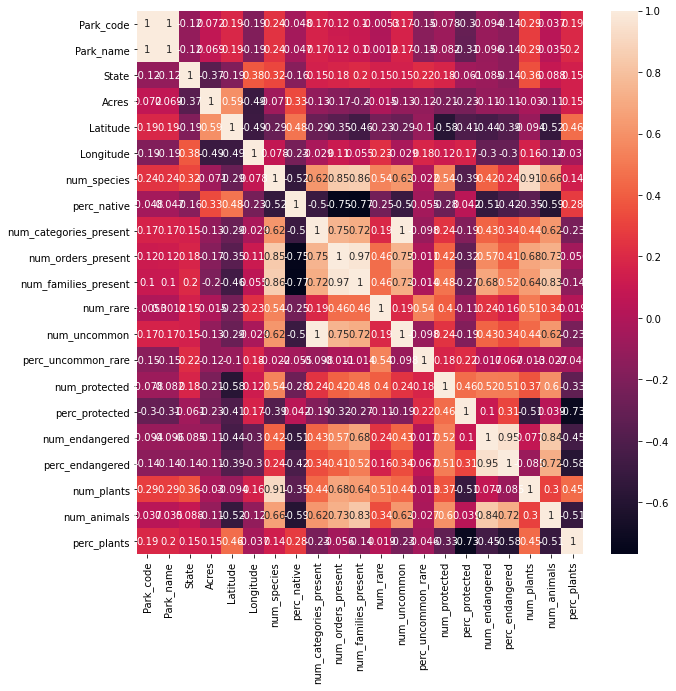

In [67]:
fig, ax = plt.subplots(figsize=(10,10))

sns.heatmap(corrMatrix, annot=True)
plt.show()

### Modeling to Predict "Nativeness"

In [68]:
#how many labels are in the Nativeness column?
species_final["Nativeness"].value_counts()

0    58891
1     8303
2     2333
Name: Nativeness, dtype: int64

In [69]:
#check data types - see if our label encoding behaved
species_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 69527 entries, 0 to 119247
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   Park_name             69527 non-null  int64
 1   Category              69527 non-null  int64
 2   Order                 69527 non-null  int64
 3   Family                69527 non-null  int64
 4   Scientific_name       69527 non-null  int64
 5   Record_status         69527 non-null  int64
 6   Occurrence            69527 non-null  int64
 7   Nativeness            69527 non-null  int64
 8   Abundance             69527 non-null  int64
 9   Seasonality           69527 non-null  int64
 10  Conservation_status   69527 non-null  int64
 11  plant_animal_boolean  69527 non-null  int64
dtypes: int64(12)
memory usage: 6.9 MB


In [70]:
#import train_test_split
from sklearn.model_selection import train_test_split

X = species_final.drop('Nativeness', axis=1)
y = species_final['Nativeness']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [71]:
#scale dataset
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [72]:
#set up Logistic Regression model
from sklearn.linear_model import LogisticRegression

regression_rev = LogisticRegression()
regression_rev.fit(X_train, y_train)

LogisticRegression()

In [73]:
#check performance of regression model
regression_rev.fit(X_train, y_train)
y_pred = regression_rev.predict(X_test)
regression_rev.score(X_test, y_test)

0.8613548108730045

In [74]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)
cm

array([[11691,     0,    88],
       [ 1661,     0,     0],
       [  179,     0,   287]])

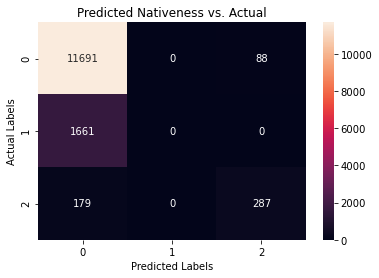

In [75]:
import matplotlib.pyplot as plt
import seaborn as sns

ax = sns.heatmap(cm, annot=True, fmt='g')
ax.set_title('Predicted Nativeness vs. Actual')
ax.set_xlabel('Predicted Labels')
ax.set_ylabel('Actual Labels')

plt.show()

In [76]:
#import MSE - check RMSE
from sklearn.metrics import mean_squared_error as MSE

rmse_log_rev = MSE(y_test, y_pred) ** (1/2)
print(rmse_log_rev)

0.4429968675411031


In [77]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [78]:
X = species_final.drop('Nativeness', axis=1)
y = species_final['Nativeness']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

#scale dataset
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [79]:
dt_rev = DecisionTreeClassifier(max_depth=5, random_state=42)
dt_rev.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=42)

In [80]:
y_pred = dt_rev.predict(X_test)

dt_rev_score = accuracy_score(y_test, y_pred)
print(dt_rev_score)

0.867107723284913


In [81]:
cm_dt = confusion_matrix(y_test, y_pred)
cm_dt

array([[11673,    97,     9],
       [ 1574,    87,     0],
       [  166,     2,   298]])

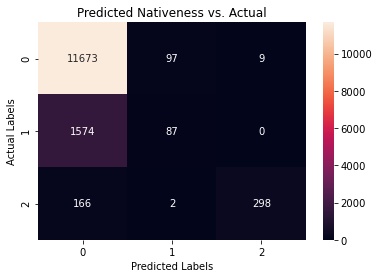

In [82]:
ax = sns.heatmap(cm_dt, annot=True, fmt='g')
ax.set_title('Predicted Nativeness vs. Actual')
ax.set_xlabel('Predicted Labels')
ax.set_ylabel('Actual Labels')

plt.show()

In [83]:
#check rmse
rmse_dt_rev = MSE(y_test, y_pred) ** (1/2)
print(rmse_dt_rev)

0.4130929246770474


In [84]:
#Random Forest
from sklearn.ensemble import RandomForestRegressor

#set seed
SEED = 42

X = species_final.drop('Nativeness', axis=1)
y = species_final['Nativeness']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = SEED)

#scale dataset
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [85]:
rf_rev = RandomForestRegressor(n_estimators = 400, min_samples_leaf = 0.1, random_state = SEED)
rf_rev.fit(X_train, y_train)

RandomForestRegressor(min_samples_leaf=0.1, n_estimators=400, random_state=42)

In [86]:
y_pred = rf_rev.predict(X_test)

rmse_rf_rev = MSE(y_test, y_pred) ** (1/2)
print(rmse_rf_rev)

0.4412375177180522


In [87]:
#neural network imports
import tensorflow
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [88]:
X = species_final.drop('Nativeness', axis=1)
y = species_final['Nativeness']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)

#scale dataset
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

number_features = X_train.shape[1]

In [89]:
#defining the model
model_rev = Sequential()
model_rev.add(Dense(100, activation='relu', kernel_initializer='he_normal', input_shape=(number_features,)))
model_rev.add(Dense(100, activation='relu', kernel_initializer='he_normal'))
model_rev.add(Dense(4, activation='softmax'))

In [90]:
model_rev.compile(optimizer='adam', loss='sparse_categorical_crossentropy', 
                  metrics=['accuracy'])

In [91]:
model_rev.fit(X_train, y_train, epochs=100, batch_size=100, verbose=2)

Epoch 1/100
557/557 - 2s - loss: 0.4303 - accuracy: 0.8536
Epoch 2/100
557/557 - 2s - loss: 0.3791 - accuracy: 0.8670
Epoch 3/100
557/557 - 1s - loss: 0.3721 - accuracy: 0.8668
Epoch 4/100
557/557 - 1s - loss: 0.3692 - accuracy: 0.8676
Epoch 5/100
557/557 - 1s - loss: 0.3651 - accuracy: 0.8679
Epoch 6/100
557/557 - 1s - loss: 0.3617 - accuracy: 0.8683
Epoch 7/100
557/557 - 1s - loss: 0.3600 - accuracy: 0.8681
Epoch 8/100
557/557 - 1s - loss: 0.3568 - accuracy: 0.8687
Epoch 9/100
557/557 - 1s - loss: 0.3543 - accuracy: 0.8699
Epoch 10/100
557/557 - 1s - loss: 0.3520 - accuracy: 0.8700
Epoch 11/100
557/557 - 1s - loss: 0.3509 - accuracy: 0.8697
Epoch 12/100
557/557 - 1s - loss: 0.3484 - accuracy: 0.8699
Epoch 13/100
557/557 - 1s - loss: 0.3464 - accuracy: 0.8710
Epoch 14/100
557/557 - 1s - loss: 0.3447 - accuracy: 0.8709
Epoch 15/100
557/557 - 1s - loss: 0.3430 - accuracy: 0.8711
Epoch 16/100
557/557 - 1s - loss: 0.3418 - accuracy: 0.8708
Epoch 17/100
557/557 - 1s - loss: 0.3398 - accura